# Projet Exercice KNN



## Les données du Sonar

### Détecter un rocher ou une mine

Un sonar (sound navigation ranging) est une technique qui utilise la propagation du son (généralement sous l'eau, comme dans la navigation sous-marine) pour naviguer, communiquer ou détecter des objets sur ou sous la surface de l'eau, comme d'autres navires.

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Le dataset contient les mesures de réponse pour 60 fréquences sonar distinctes envoyées contre un champ de mines connu (et des rochers connus). Ces fréquences sont ensuite étiquetées en fonction de l'objet connu sur lequel le son était dirigé (soit un rocher, soit une mine).

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/mine.jpg"  style="max-height: 500px; max-width: 500px;">

Notre objectif principal est de créer un modèle de Machine Learning capable de détecter la différence entre un rocher et une mine sur la base de la réponse des 60 fréquences sonar distinctes.


Data Source : https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



---
---





In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:

url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/sonar.all-data.csv'
df = pd.read_csv(url)


In [9]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [10]:
df['Label'] = df['Label'].apply(lambda x : 1 if x == 'M' else 0)

## Exploration des Données



<Axes: >

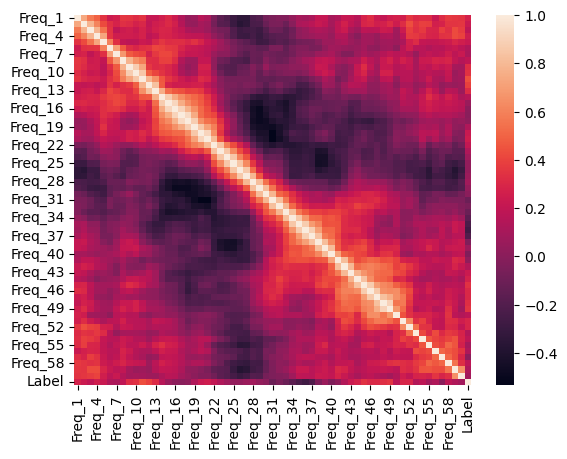

In [11]:
# code ici

sns.heatmap(df.corr())

**les 5 fréquences les plus corrélées avec la variable cible (label/target) ?**

*Note :faire correspondre le label ou l'étiquette à des 0 et des 1.*


In [12]:
# code ici

two_features_more = df.corr()['Label'].sort_values(ascending=False)[1:3]
two_features_more

,Label
Freq_11,0.432855
Freq_12,0.392245


## Fractionnement Entraînement / Test

validation croisée (Cross Validation) sur 90% de l'ensemble de données, puis à juger nos résultats sur un ensemble de test final de 10%


In [13]:
# code ici
from sklearn.model_selection import train_test_split
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

**PipeLine qui contient à la fois un StandardScaler et un modèle KNN.**

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]
pipeline = Pipeline(operations)

**recherche par grille (GridSearch) avec le pipeline pour tester différentes valeurs de k et rapporter les paramètres les plus performants.**

In [15]:
# code ici
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}

In [16]:
full_cv_classifier = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring='accuracy')

In [17]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

**avec le dictionnaire .cv_results_ créer un graphique de la moyenne des scores de test (mean_test_score) par valeur K.**

In [18]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [19]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

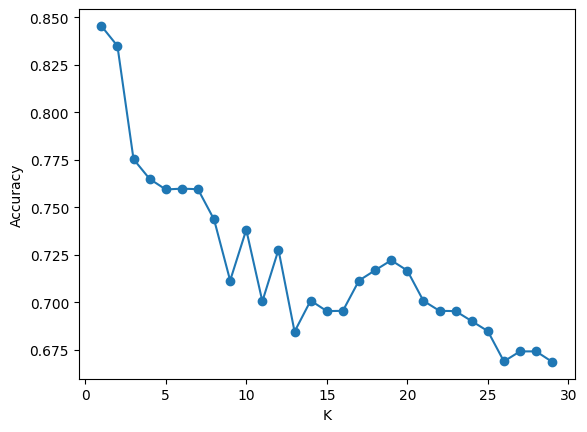

In [20]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy");

## Évaluation finale du modèle


In [21]:
pred = full_cv_classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
confusion_matrix(y_test,pred)

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

